<a href="https://colab.research.google.com/github/RivadineiraVargas/Machine_Learning_DIO/blob/main/Dataset_Prueba_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow_datasets as tfds

# Cargar dataset
(ds_train, ds_validation), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]'], # 80% entrenamiento, 10% validación
    with_info=True,
    as_supervised=True,
)

# Preprocesamiento de las imágenes y creación de lotes
IMG_SIZE = 160
def resize_and_rescale(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

ds_train = ds_train.map(resize_and_rescale).batch(32)
ds_validation = ds_validation.map(resize_and_rescale).batch(32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.G1WGOY_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
# Carga el modelo base pre-entrenado, sin las capas superiores
base_model = tf.keras.applications.VGG16(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

# Congela para no repetir
base_model.trainable = False

# Muestra la arquitectura del modelo
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 160, 160, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 160, 160, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 80, 80, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 80, 80, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 80, 80, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 40, 40, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 40, 40, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 40, 40, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 40, 40, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 20, 20, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 20, 20, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 10, 10, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

#Modelo Completo
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,269,313 (81.14 MB)

 Trainable params: 6,554,625 (25.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [5]:
# Entrenar
history = model.fit(
    ds_train,
    epochs=10, #Número de épocas
    validation_data=ds_validation
)

Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 100s 151ms/step - accuracy: 0.8326 - loss: 0.4505 - val_accuracy: 0.9063 - val_loss: 0.2165
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 69s 118ms/step - accuracy: 0.9016 - loss: 0.2252 - val_accuracy: 0.9106 - val_loss: 0.2088
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9106 - loss: 0.2087 - val_accuracy: 0.8998 - val_loss: 0.2398
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 82s 118ms/step - accuracy: 0.9208 - loss: 0.1892 - val_accuracy: 0.9093 - val_loss: 0.2177
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9256 - loss: 0.1784 - val_accuracy: 0.9114 - val_loss: 0.2125
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 68s 116ms/step - accuracy: 0.9302 - loss: 0.1655 - val_accuracy: 0.9101 - val_loss: 0.2287
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 68s 117ms/step - accuracy: 0.9351 - loss: 0.1531 - val_accuracy: 0.9140 - val_loss: 0.2095
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 71s 122ms/step - accuracy: 0.9387 - loss: 

In [6]:
# Evalúa el modelo en los datos de validación
loss, accuracy = model.evaluate(ds_validation)
print(f'Precisión en validación: {accuracy*100:.2f}%')

# Guarda el modelo
model.save('transfer_learning_model.h5')

73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9135 - loss: 0.2346


Precisión en validación: 91.19%


In [7]:
# Muestra los valores de precisión y pérdida
print(history.history.keys())

# Precisión final en el conjunto de validación
final_accuracy = history.history['val_accuracy'][-1]
print(f'Precisión final en validación: {final_accuracy*100:.2f}%')

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Precisión final en validación: 91.19%


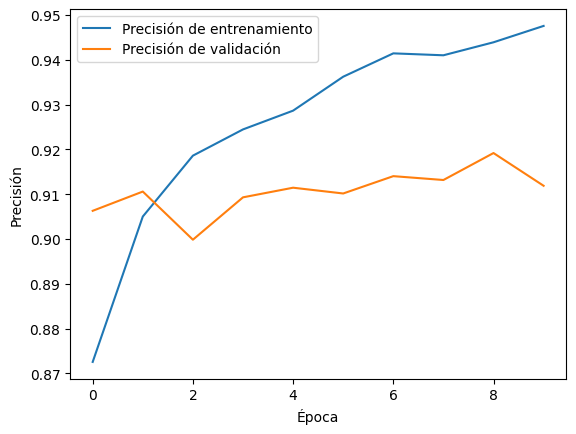

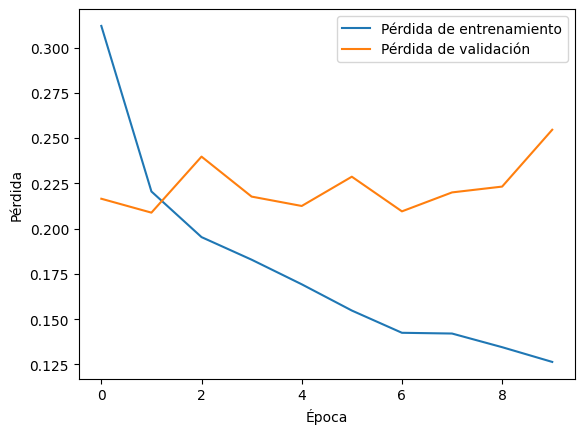

In [8]:
import matplotlib.pyplot as plt

# Gráfico precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Gráfico pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()